# train.csv
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to - categorize KKBOX mobile apps functions. For example, tab my library contains functions to -manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading train document
train=pd.read_csv('data/train.csv', na_values='Unknown')
print(train.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  onli

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [4]:
#List unique values in source_system_tab column
train.source_system_tab.unique()

array(['explore', 'my library', 'search', 'discover', nan, 'radio',
       'listen with', 'notification', 'settings'], dtype=object)

In [5]:
#List how many entries there are of each type in source_system_tab
train.source_system_tab.value_counts(dropna=False)

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
NaN               24849
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

#Comments about source_system_tab column in train doc
- NAN only represent around 0.34% of the total
- The most popular/accesible system tabs are 'my library' and 'discover'

In [6]:
#List how many entries there are of each type in source_type
train.source_type.value_counts(dropna=False)

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
NaN                         21539
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [7]:
#Make sure the target column is correct (only 0 or 1 values)
train.target.value_counts(dropna=False)

1    3714656
0    3662762
Name: target, dtype: int64

In [8]:
#Check if the relationship users-song_id is 1 to 1 as stated in the documentation
train.groupby(['msno','song_id'])['target'].count().sort_values(ascending=False).head()

msno                                          song_id                                     
zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=  wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    1
JlclbZ87Se0GRiCBvoyWzAhSKdj/TPee2qC2KnJBcyQ=  rG9ZNLzZjEAI06bHg5jNbG7KptynQvEVQiHo+YLdT8k=    1
                                              wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    1
                                              wJdog4OHtULqly94aQ/X2uud6ya+juDh25ay4sqoxuI=    1
                                              wSzDoYx37ySD3tRiQrOs17vjwi1KQj3TLtb3p6VY+2A=    1
Name: target, dtype: int64

In [9]:
#Number of unique users in the train data
train.msno.unique().shape

(30755,)

In [10]:
#Number of unique songs in the train data
train.song_id.unique().shape

(359966,)

There are 30755 unique users and 359966 unique songs in the train document.

In [11]:
#Checking if there are NAN in song_id
train.song_id.isnull().sum()

0

In [12]:
#List how many entries there are of each type in source_screen_name
train.source_screen_name.value_counts(dropna=False)

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
NaN                      468974
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

#Notes
- Unknown values have been replaced by NAN, so they are tagged under NAN in the previous list
- The amount of NAN values cannot be neglected (around 6.4%)
- 'Local playlist more' and 'Online playlist more' are the most popular/accesible source screens 

In [13]:
#Probability of a song to be played again depending on the source_system_tab
train.groupby(['source_system_tab'])['target'].mean().sort_values(ascending=False)

source_system_tab
my library      0.619659
settings        0.590909
explore         0.422146
search          0.421362
discover        0.415770
notification    0.378011
listen with     0.326581
radio           0.222662
Name: target, dtype: float64

- It is more likely that a song will be played again if it was launched from 'my library' (which is the most commun source system tab used) or from 'settings' (this is not such a popular tab) than if it was played from another tab. 
- On the other hand, it is not very likely that a song will be played again if it was listened from radio tab. 

In [14]:
#Show probabily of a song to be played again based on the source-type/source_screen combination
screen_type=train.groupby(['source_screen_name','source_type'])['target'].mean()
#Display source_type in columns and source_screen_name in rows
screen_type=screen_type.unstack()
#In order to plot data, NAN will be replaced by zeros
screen_type.fillna(0)

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
source_screen_name,,,,,,,,,,,,
Album more,0.390187,0.000000,0.000000,0.661784,0.757033,0.000000,0.507042,0.171488,0.444444,0.000000,0.000000,0.000000
Artist more,0.216667,0.000000,0.000000,1.000000,0.000000,0.000000,0.427410,0.815166,0.444444,0.000000,0.416628,0.000000
Concert,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510638,0.000000,0.000000,0.000000,0.000000,0.000000
Discover Chart,0.052632,0.000000,0.250000,0.392857,0.000000,0.000000,0.517422,0.232143,1.000000,0.282609,0.000000,0.000000
Discover Feature,0.326733,0.000000,0.184416,0.603325,0.705882,0.344729,0.368402,0.506770,0.367965,0.357574,0.471910,0.000000
Discover Genre,0.280127,0.000000,0.000000,0.586957,1.000000,0.000000,0.353274,0.000000,0.500000,0.160714,0.000000,0.000000
Discover New,0.271249,0.000000,0.000000,0.000000,1.000000,0.000000,0.480736,0.076923,0.666667,0.222222,0.000000,0.000000
Explore,0.393513,0.000000,0.085271,0.435644,0.588710,0.000000,0.451642,0.066667,0.423105,0.916667,0.292510,0.558715
Local playlist more,0.524102,0.563751,0.257732,0.630529,0.655555,0.576923,0.418799,0.282939,0.571429,0.374885,0.459293,0.000000


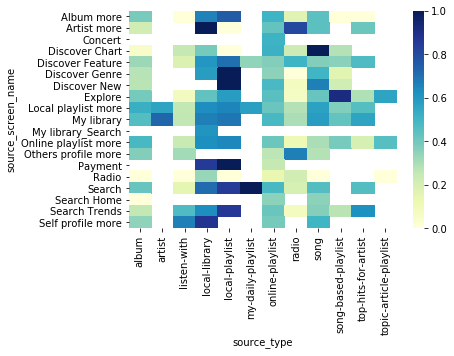

In [15]:
#Plot heatmap showing probability of re-play song based on the source-type/source_screen combination
sns.heatmap(screen_type, cmap="YlGnBu")

Songs that were accessed from Local-library and local-playlist source types have high chances to be re-played. These 2 types are the 1st and 3rd most popular among users. 

In [16]:
#Show probabily of a song to be played again based on the source-system_tab/source_screen combination
system_screen=train.groupby(['source_system_tab','source_screen_name'])['target'].mean()
system_screen=system_screen.unstack()
system_screen.fillna(0)

source_screen_name,Album more,Artist more,Concert,Discover Chart,Discover Feature,Discover Genre,Discover New,Explore,Local playlist more,My library,My library_Search,Online playlist more,Others profile more,Payment,Radio,Search,Search Home,Search Trends,Self profile more
source_system_tab,,,,,,,,,,,,,,,,,,,
discover,0.356544,0.371375,0.000000,0.516998,0.363363,0.347306,0.455031,0.142857,0.455488,0.324111,0.000000,0.421039,0.200507,0.500000,0.113656,0.431037,0.000000,0.347136,0.333333
explore,0.366702,0.361618,0.000000,0.000000,0.000000,0.000000,0.000000,0.448324,0.387884,0.000000,0.000000,0.409667,0.352273,0.000000,0.161240,0.421274,0.253012,0.310345,0.000000
listen with,0.359436,0.352500,0.465116,0.517647,0.205607,0.000000,0.857143,0.172414,0.528919,0.000000,0.000000,0.399881,0.314497,0.000000,0.443750,0.414258,0.000000,0.361446,0.522388
my library,0.423079,0.439718,1.000000,0.500000,0.458738,0.313253,0.761905,0.501229,0.640319,0.658295,0.611223,0.389315,0.331055,1.000000,0.219050,0.490570,0.318182,0.394853,0.381295
notification,0.409831,0.388889,0.000000,0.315789,0.137255,0.807692,0.500000,0.000000,0.452663,0.000000,0.000000,0.281341,0.392248,0.000000,0.000000,0.493333,0.000000,0.343750,0.000000
radio,0.320128,0.339339,0.000000,0.750000,0.652055,0.000000,0.000000,0.333333,0.386538,0.000000,0.000000,0.309839,0.404706,0.000000,0.217438,0.441667,0.000000,0.391892,0.000000
search,0.401083,0.422800,0.000000,0.650000,0.500000,0.000000,0.000000,0.377323,0.478897,0.000000,0.000000,0.365063,0.209967,0.000000,0.251524,0.474966,0.354810,0.000000,0.000000
settings,0.322148,0.000000,0.000000,0.631579,0.370370,0.533333,0.000000,0.000000,0.520305,0.000000,0.000000,0.322148,1.000000,0.571429,0.000000,0.355556,0.000000,0.333333,0.000000


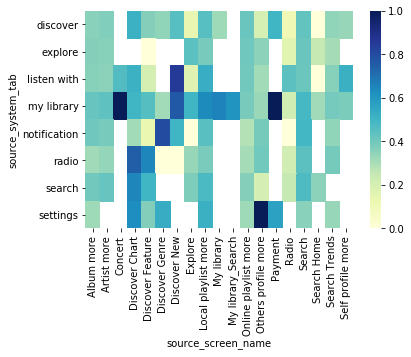

In [17]:
#Plot heatmap showing probability of re-play song based on the source-type/source_screen combination
sns.heatmap(system_screen, cmap="YlGnBu")

There are not specific source screen or source system that seem to drive better results. There are some system_tab, source_screen couples that are worth exploring further, to see if the high probability is driven by a low volumen or it can be a real driver for a song to be re-play.

In [18]:
#Show counts of source-system_tab/source_screen combinations
system_screen_counts=train.groupby(['source_system_tab','source_screen_name'])['target'].count()
system_screen_counts=system_screen_counts.unstack()
print(system_screen_counts)

source_screen_name  Album more  Artist more  Concert  Discover Chart  \
source_system_tab                                                      
discover              141820.0      33314.0      NaN        213084.0   
explore                10469.0       1261.0      NaN             NaN   
listen with             1277.0        400.0     43.0            85.0   
my library            112121.0      27081.0      4.0           308.0   
notification            3133.0         54.0      NaN            19.0   
radio                   1868.0       1665.0      NaN            16.0   
search                149206.0     188652.0      NaN            20.0   
settings                 149.0          NaN      NaN            38.0   

source_screen_name  Discover Feature  Discover Genre  Discover New  Explore  \
source_system_tab                                                             
discover                    243005.0         81899.0       15922.0      7.0   
explore                          8.0      

The following source-system_tab/source_screen combination show high probability:
    - My library, Concert
    - Listen with, Discover New
    - Notification, Discover Genre
    - My library, Discover New
    - My library, Payment
    - Payment, Settings
    
But the number of occurrences it is very low for any of the combinations. The maximum number is observed for Notification, Discover Genre with 104.
No meaningful insights can be driven from here. 

In [19]:
#Show probabily of a song to be played again based on the source-system_tab/source_type combination
system_type=train.groupby(['source_system_tab','source_type'])['target'].mean()
system_type=system_type.unstack()
system_type.fillna(0)

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
source_system_tab,,,,,,,,,,,,
discover,0.352418,0.891892,0.193109,0.507436,0.656369,0.375566,0.427084,0.142400,0.348064,0.380117,0.398697,0.209091
explore,0.382789,0.000000,0.267913,0.372453,0.707510,0.000000,0.427767,0.133333,0.339503,0.846154,0.389034,0.500973
listen with,0.362267,0.666667,0.321941,0.559693,0.601562,0.000000,0.395845,0.365854,0.281300,0.160920,0.385203,0.086957
my library,0.437544,0.568425,0.313898,0.635424,0.657703,0.000000,0.454019,0.227532,0.403690,0.470443,0.437672,0.649123
notification,0.409265,0.000000,0.400000,0.466216,0.500000,0.000000,0.312362,0.181818,0.381443,0.068966,0.333333,0.000000
radio,0.320128,1.000000,0.396270,0.375533,0.621951,0.000000,0.377599,0.219829,0.367123,0.700000,0.357790,0.222222
search,0.402182,0.000000,0.203777,0.474405,0.780161,0.000000,0.366803,0.277394,0.477586,0.666667,0.423450,0.423913
settings,0.329032,0.000000,0.000000,0.712000,0.750000,0.000000,0.368132,0.181818,0.250000,0.305556,0.379487,0.000000


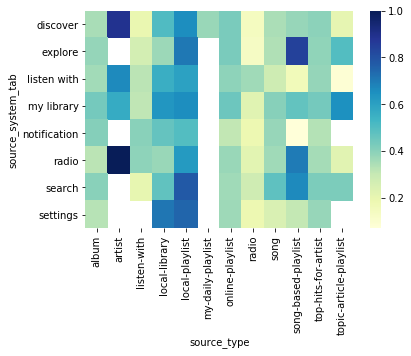

In [20]:
#Plot heatmap showing probability of re-play song based on the source_system_tab/source_type combination
sns.heatmap(system_type, cmap="YlGnBu")

In [21]:
#Show counts of source-system_tab/source_type combinations
system_type_counts=train.groupby(['source_system_tab','source_type'])['target'].count()
system_type_counts=system_type_counts.unstack()
print(system_type_counts)

source_type           album  artist  listen-with  local-library  \
source_system_tab                                                 
discover           164529.0    37.0       2496.0        42226.0   
explore             18663.0     NaN        321.0         2258.0   
listen with          1394.0     3.0     181825.0          913.0   
my library         129932.0  2996.0       6260.0      2205014.0   
notification         3130.0     NaN        470.0          296.0   
radio                1868.0     2.0        429.0         1406.0   
search             157533.0     NaN       1006.0         6642.0   
settings              155.0     NaN          NaN          875.0   

source_type        local-playlist  my-daily-playlist  online-playlist  \
source_system_tab                                                       
discover                   5762.0              663.0        1597867.0   
explore                     253.0                NaN         127275.0   
listen with                 256.0    

From combinations source_system_tab and source_type we see with a decent number of observation and high probability the combination 'search' - 'local-library'

# songs.csv
The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language

In [22]:
songs=pd.read_csv('data/songs.csv')
print(songs.head())
print(songs.shape)
print(songs.info())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  
(2296320, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229632

In [23]:
print(songs.describe())

        song_length      language
count  2.296320e+06  2.296319e+06
mean   2.469935e+05  3.237800e+01
std    1.609200e+05  2.433241e+01
min    1.850000e+02 -1.000000e+00
25%    1.836000e+05 -1.000000e+00
50%    2.266270e+05  5.200000e+01
75%    2.772690e+05  5.200000e+01
max    1.217385e+07  5.900000e+01


In [24]:
s_submission=pd.read_csv('data/sample_submission.csv')
print(s_submission.head())
print(s_submission.shape)
print(s_submission.info())

   id  target
0   0     0.5
1   1     0.5
2   2     0.5
3   3     0.5
4   4     0.5
(2556790, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
id        int64
target    float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB
None


In [25]:
test=pd.read_csv('data/test.csv')
print(test.head())
print(test.shape)
print(test.info())

   id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  
0  Local playlist more        local-library  
1  Local playlist more        local-library  
2                  NaN  song-based-playlist  
3                Radio                radio  
4                Radio  

In [26]:
members=pd.read_csv('data/members.csv')
print(members.head())
print(members.shape)
print(members.info())

                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613  
(34403, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd         

Notes:
- Most likely customer gender won't be a factor to decide wether a song is played again or not since this property has many NaN
- Registration_init_time and expiration_date need to be transform to datetime format

In [ ]:
song_extra=pd.read_csv('data/song_extra_info.csv')
print(song_extra.head())
print(song_extra.shape)
print(song_extra.info())